In [3]:
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

# Get the Test Data 

In [4]:
test_df = pd.read_csv("../datasets/attribute_set/in_shop_attr/test_in_shop_partitioned.csv", index_col=0) 
test_df.shape 

(4441, 350)

# Models 
## Model 2: Efficient Net

In [5]:
import tensorflow as tf 

model_2_loaded = tf.keras.models.load_model("../trained_models/IN_SHOP_Models/model_2_efficient_net.h5") 

In [6]:
from helpers import predict 
y_hats = predict(test_df.iloc[:, 0], model_2_loaded)

100 th iteration. You have 4441 inputs. 
200 th iteration. You have 4441 inputs. 
300 th iteration. You have 4441 inputs. 
400 th iteration. You have 4441 inputs. 
500 th iteration. You have 4441 inputs. 
600 th iteration. You have 4441 inputs. 
700 th iteration. You have 4441 inputs. 
800 th iteration. You have 4441 inputs. 
900 th iteration. You have 4441 inputs. 
1000 th iteration. You have 4441 inputs. 
1100 th iteration. You have 4441 inputs. 
1200 th iteration. You have 4441 inputs. 
1300 th iteration. You have 4441 inputs. 
1400 th iteration. You have 4441 inputs. 
1500 th iteration. You have 4441 inputs. 
1600 th iteration. You have 4441 inputs. 
1700 th iteration. You have 4441 inputs. 
1800 th iteration. You have 4441 inputs. 
1900 th iteration. You have 4441 inputs. 
2000 th iteration. You have 4441 inputs. 
2100 th iteration. You have 4441 inputs. 
2200 th iteration. You have 4441 inputs. 
2300 th iteration. You have 4441 inputs. 
2400 th iteration. You have 4441 inputs. 
2

In [29]:
from helpers import evaluate_img, show_image
threshold = 0.40 

In [8]:
import numpy as np 
y_hats = np.array(y_hats).squeeze()

In [30]:
from sklearn.metrics import precision_score, recall_score

copy_y_hats = y_hats.copy() 
copy_y_hats[copy_y_hats >= threshold] = 1
copy_y_hats[copy_y_hats < threshold] = 0 

recall_score(test_df.iloc[:, 3:].to_numpy(), copy_y_hats, average="weighted"), precision_score(test_df.iloc[:, 3:].to_numpy(), copy_y_hats, average="weighted")

(0.3492477386007015, 0.5074763132878333)

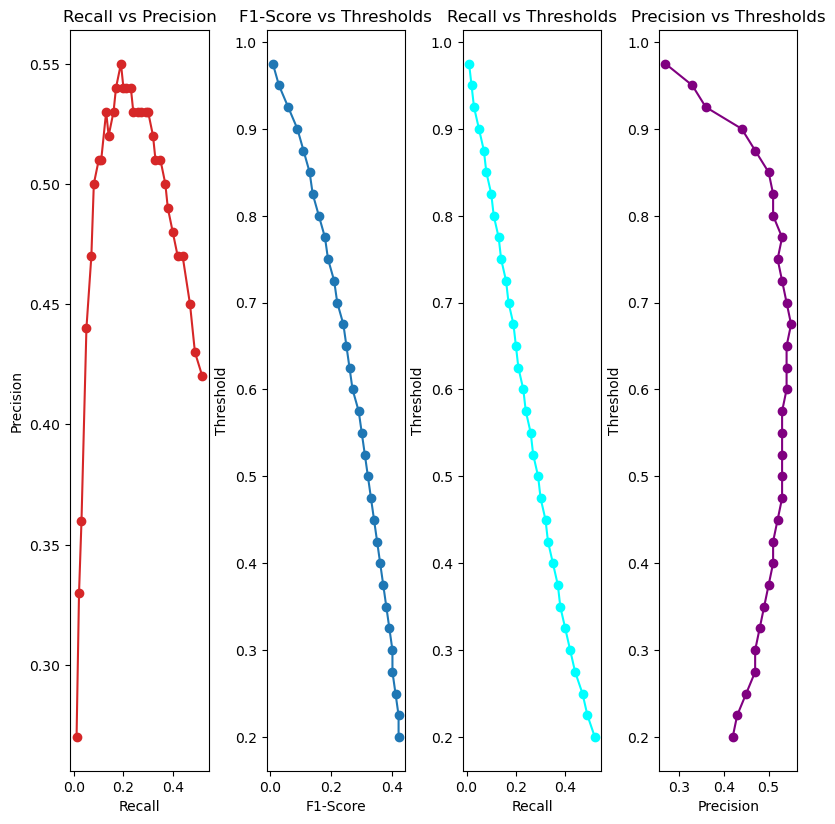

In [14]:
from helpers import plot_recall_precision_curve
res = plot_recall_precision_curve(y_hats.copy(), test_df.iloc[:, 3:].to_numpy())
del res 

In [31]:
col_names = pd.read_csv("../datasets/attribute_set/in_shop_attr/in_shop_data_all.csv").columns[4:]

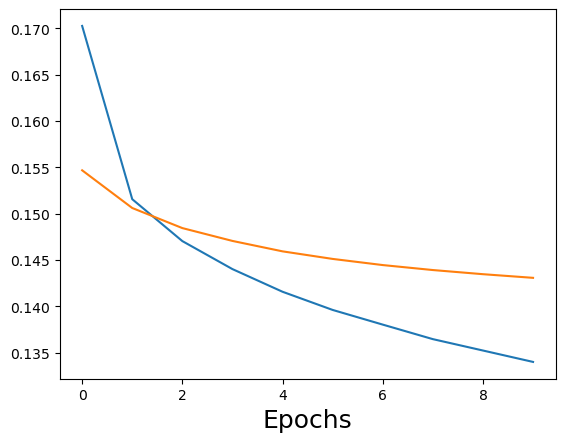

In [32]:
results_df = pd.read_csv("../trained_models/IN_SHOP_Models/model_2_efficient_net_step3.csv", index_col=0)

import matplotlib.pyplot as plt 

plt.plot(results_df.index.to_list(), results_df.loss)
plt.plot(results_df.index.to_list(), results_df.val_loss)
plt.xlabel("Epochs", fontsize=18)
plt.show() 

## Model 2.1: Efficient Net - Fine Tuned 

In [63]:
model_2_fine_tuned_loaded = tf.keras.models.load_model("../trained_models/IN_SHOP_Models/model_2_efficient_net.h5") 

In [64]:
y_hats_fine_tuned = predict(test_df.iloc[:, 0], model_2_fine_tuned_loaded)

100 th iteration. You have 4441 inputs. 
200 th iteration. You have 4441 inputs. 
300 th iteration. You have 4441 inputs. 
400 th iteration. You have 4441 inputs. 
500 th iteration. You have 4441 inputs. 
600 th iteration. You have 4441 inputs. 
700 th iteration. You have 4441 inputs. 
800 th iteration. You have 4441 inputs. 
900 th iteration. You have 4441 inputs. 
1000 th iteration. You have 4441 inputs. 
1100 th iteration. You have 4441 inputs. 
1200 th iteration. You have 4441 inputs. 
1300 th iteration. You have 4441 inputs. 
1400 th iteration. You have 4441 inputs. 
1500 th iteration. You have 4441 inputs. 
1600 th iteration. You have 4441 inputs. 
1700 th iteration. You have 4441 inputs. 
1800 th iteration. You have 4441 inputs. 
1900 th iteration. You have 4441 inputs. 
2000 th iteration. You have 4441 inputs. 
2100 th iteration. You have 4441 inputs. 
2200 th iteration. You have 4441 inputs. 
2300 th iteration. You have 4441 inputs. 
2400 th iteration. You have 4441 inputs. 
2

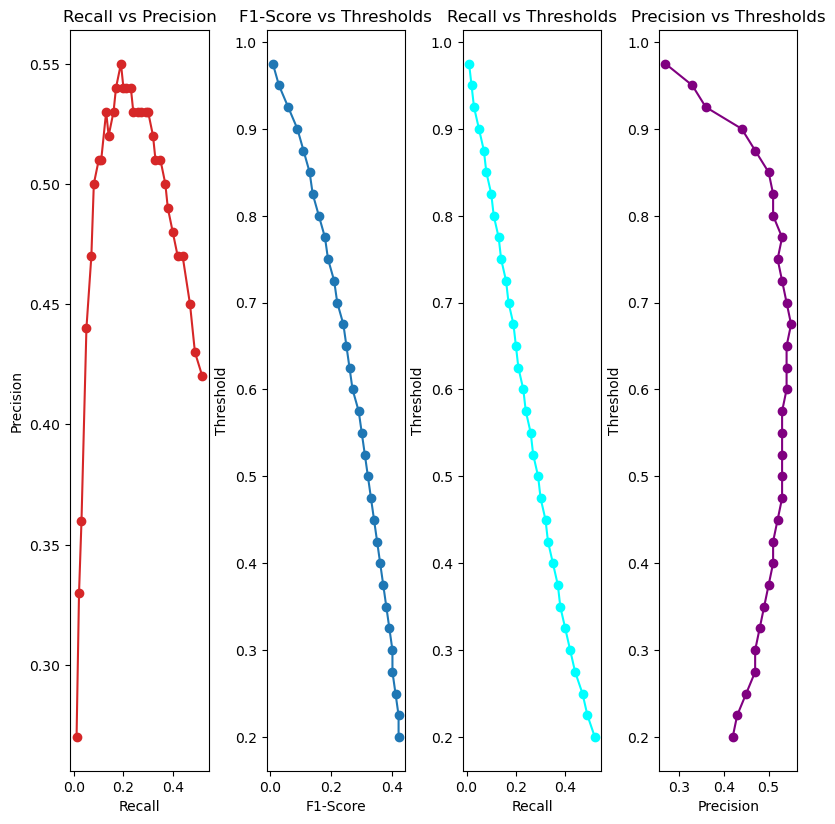

In [65]:
plot_recall_precision_curve(np.array(y_hats_fine_tuned).squeeze(), test_df.iloc[:, 3:].to_numpy())

In [66]:
threshold = 0.50
copy_y_hats = np.array(y_hats_fine_tuned).squeeze()
copy_y_hats[copy_y_hats >= threshold] = 1
copy_y_hats[copy_y_hats < threshold] = 0 

recall_score(test_df.iloc[:, 3:].to_numpy(), copy_y_hats, average="weighted"), precision_score(test_df.iloc[:, 3:].to_numpy(), copy_y_hats, average="weighted")

(0.28677081410374744, 0.5323420611922728)

In [67]:
fines = pd.read_csv("../trained_models/IN_SHOP_Models/model_2_efficient_net_fine_tune_STEP_3_OverFitting.csv", index_col=0)[['val_precision', 'val_recall', 'recall', 'precision']]
normals = pd.read_csv("../trained_models/IN_SHOP_Models/model_2_efficient_net.csv", index_col=0)[['val_precision', 'val_recall', 'recall', 'precision']]

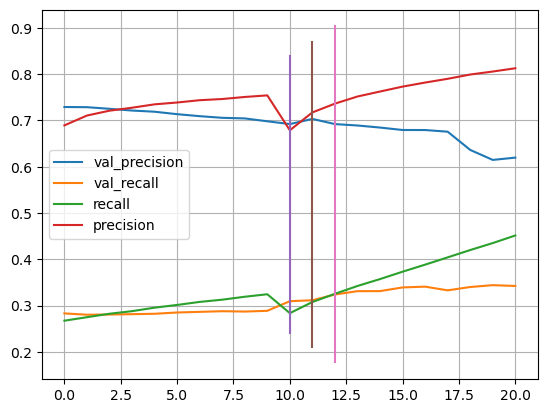

In [68]:
import matplotlib.pyplot as plt 

vis = pd.concat([normals, fines]).reset_index(drop=True)
vis.plot() 
plt.plot([10, 10], plt.ylim())
plt.plot([11, 11], plt.ylim())
plt.plot([12, 12], plt.ylim())

plt.grid() 
plt.show() 

## Model 2.2: Efficient Net - Fine Tuned (Epoch 12)

In [69]:
model_2_fine_tuned_epoch_12_loaded = tf.keras.models.load_model("../trained_models/IN_SHOP_Models/model_2_efficient_net_fine_tune_epoch12.h5") 

In [70]:
y_hats_fine_tuned_epoch_12 = predict(test_df.iloc[:, 0], model_2_fine_tuned_epoch_12_loaded)

100 th iteration. You have 4441 inputs. 
200 th iteration. You have 4441 inputs. 
300 th iteration. You have 4441 inputs. 
400 th iteration. You have 4441 inputs. 
500 th iteration. You have 4441 inputs. 
600 th iteration. You have 4441 inputs. 
700 th iteration. You have 4441 inputs. 
800 th iteration. You have 4441 inputs. 
900 th iteration. You have 4441 inputs. 
1000 th iteration. You have 4441 inputs. 
1100 th iteration. You have 4441 inputs. 
1200 th iteration. You have 4441 inputs. 
1300 th iteration. You have 4441 inputs. 
1400 th iteration. You have 4441 inputs. 
1500 th iteration. You have 4441 inputs. 
1600 th iteration. You have 4441 inputs. 
1700 th iteration. You have 4441 inputs. 
1800 th iteration. You have 4441 inputs. 
1900 th iteration. You have 4441 inputs. 
2000 th iteration. You have 4441 inputs. 
2100 th iteration. You have 4441 inputs. 
2200 th iteration. You have 4441 inputs. 
2300 th iteration. You have 4441 inputs. 
2400 th iteration. You have 4441 inputs. 
2

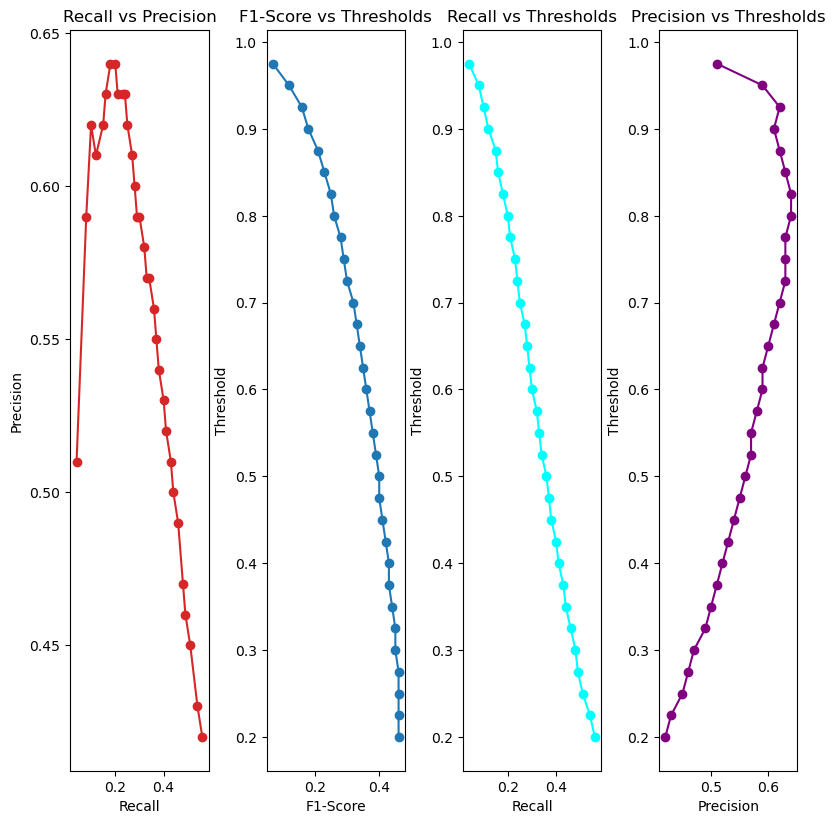

In [71]:
plot_recall_precision_curve(np.array(y_hats_fine_tuned_epoch_12).squeeze(), test_df.iloc[:, 3:].to_numpy())

In [85]:
threshold = 0.59
copy_y_hats = np.array(y_hats_fine_tuned_epoch_12).squeeze()
copy_y_hats[copy_y_hats >= threshold] = 1
copy_y_hats[copy_y_hats < threshold] = 0 

recall_score(test_df.iloc[:, 3:].to_numpy(), copy_y_hats, average="weighted"), precision_score(test_df.iloc[:, 3:].to_numpy(), copy_y_hats, average="weighted")

(0.30915405205833485, 0.5835729908415541)

## Model 2: Efficient Net - Fine Tuned With Multi Optimizer 

In [87]:
#!pip install tensorflow-addons

  Using cached tensorflow_addons-0.19.0-cp39-cp39-win_amd64.whl (742 kB)
  Using cached typeguard-2.13.3-py3-none-any.whl (17 kB)


In [90]:
model_2_fine_tuned_multi_opt_loaded = tf.keras.models.load_model("../trained_models/IN_SHOP_Models/model_2_fine_multi_optimizer_STEP3_V2.h5") 

In [91]:
y_hats_fine_tuned_multi_opt = predict(test_df.iloc[:, 0], model_2_fine_tuned_multi_opt_loaded)

100 th iteration. You have 4441 inputs. 
200 th iteration. You have 4441 inputs. 
300 th iteration. You have 4441 inputs. 
400 th iteration. You have 4441 inputs. 
500 th iteration. You have 4441 inputs. 
600 th iteration. You have 4441 inputs. 
700 th iteration. You have 4441 inputs. 
800 th iteration. You have 4441 inputs. 
900 th iteration. You have 4441 inputs. 
1000 th iteration. You have 4441 inputs. 
1100 th iteration. You have 4441 inputs. 
1200 th iteration. You have 4441 inputs. 
1300 th iteration. You have 4441 inputs. 
1400 th iteration. You have 4441 inputs. 
1500 th iteration. You have 4441 inputs. 
1600 th iteration. You have 4441 inputs. 
1700 th iteration. You have 4441 inputs. 
1800 th iteration. You have 4441 inputs. 
1900 th iteration. You have 4441 inputs. 
2000 th iteration. You have 4441 inputs. 
2100 th iteration. You have 4441 inputs. 
2200 th iteration. You have 4441 inputs. 
2300 th iteration. You have 4441 inputs. 
2400 th iteration. You have 4441 inputs. 
2

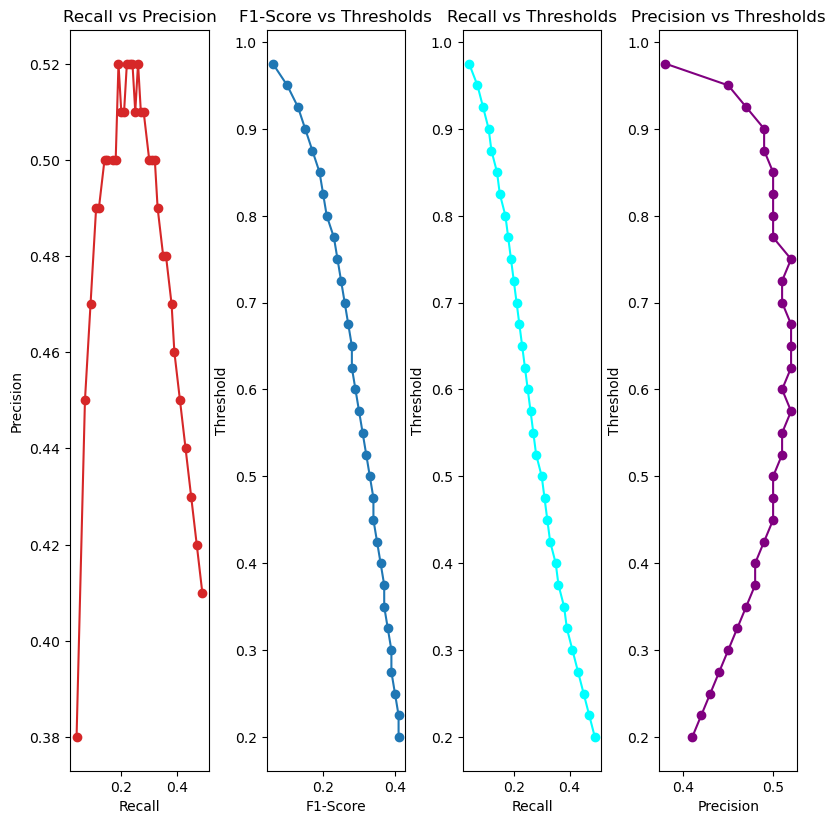

In [92]:
plot_recall_precision_curve(np.array(y_hats_fine_tuned_multi_opt).squeeze(), test_df.iloc[:, 3:].to_numpy())

In [93]:
threshold = 0.53
copy_y_hats = np.array(y_hats_fine_tuned_multi_opt).squeeze()
copy_y_hats[copy_y_hats >= threshold] = 1
copy_y_hats[copy_y_hats < threshold] = 0 

recall_score(test_df.iloc[:, 3:].to_numpy(), copy_y_hats, average="weighted"), precision_score(test_df.iloc[:, 3:].to_numpy(), copy_y_hats, average="weighted")

(0.2828710540889791, 0.5118381631169219)

# Prediction on Self Data

In [98]:
threshold = 0.59 

1/1 [==============================] - 2s 2s/step


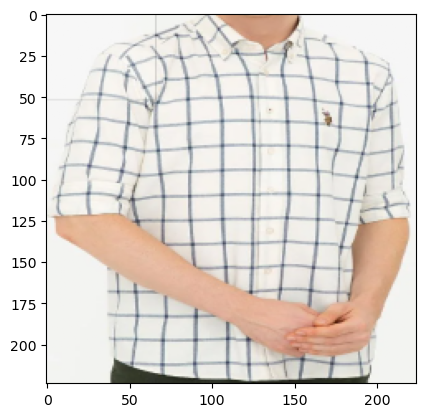

In [140]:
path = "../datasets/demos/uspa_sq.PNG"
res = evaluate_img(path, model=model_2_fine_tuned_epoch_12_loaded, columns=col_names, threshold=0.20)
show_image(path)

In [141]:
res[res.values == 1]

0_lightweight      1.0
2_woven            1.0
4_cotton           1.0
5_unlined          1.0
9_print            1.0
12_classic         1.0
13_lined           1.0
14_fit             1.0
22_buttoned        1.0
33_pocket          1.0
45_jean            1.0
47_little          1.0
49_basic           1.0
53_patch           1.0
60_casual          1.0
63_hirt            1.0
92_button          1.0
96_button-down     1.0
104_down           1.0
108_every          1.0
143_outfit         1.0
152_crisp          1.0
184_plaid          1.0
189_traditional    1.0
198_light          1.0
214_timele         1.0
224_blend          1.0
271_polish         1.0
314_fitted         1.0
317_line           1.0
321_pop            1.0
dtype: float32

1/1 [==============================] - 1s 1s/step


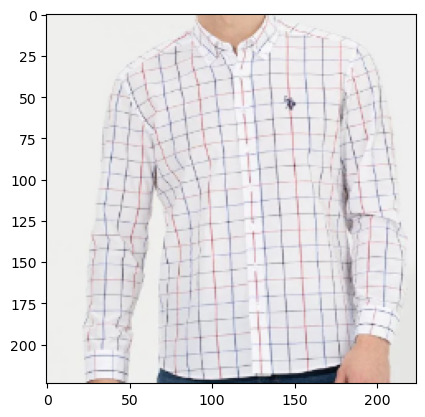

In [101]:
path = "../datasets/demos/uspa_sq2.PNG"
res2= evaluate_img(path, model=model_2_fine_tuned_epoch_12_loaded, columns=col_names, threshold=threshold)
show_image(path)

In [102]:
res2[res2.values == 1]

0_lightweight     1.0
2_woven           1.0
4_cotton          1.0
12_classic        1.0
14_fit            1.0
22_buttoned       1.0
33_pocket         1.0
49_basic          1.0
53_patch          1.0
63_hirt           1.0
92_button         1.0
96_button-down    1.0
104_down          1.0
120_cuff          1.0
152_crisp         1.0
184_plaid         1.0
198_light         1.0
218_addition      1.0
dtype: float32

In [113]:
sum([1 if item == True else 0 for item in (res != res2).to_numpy()])

7

In [125]:
set(res2[res2.values == 1].keys()).intersection(set(res[res.values == 1].keys()))

{'0_lightweight',
 '14_fit',
 '184_plaid',
 '198_light',
 '22_buttoned',
 '2_woven',
 '33_pocket',
 '4_cotton',
 '53_patch',
 '63_hirt',
 '92_button',
 '96_button-down'}

In [135]:
union = len(set(res2[res2.values == 1].keys()).union(set(res[res.values == 1].keys()))) 
intersection = len(set(res2[res2.values == 1].keys()).intersection(set(res[res.values == 1].keys())))

intersection / union

0.631578947368421

1/1 [==============================] - 1s 1s/step


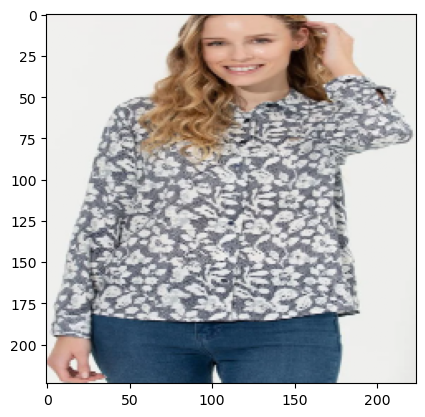

In [142]:
path = "../datasets/demos/floral.PNG"
res3 = evaluate_img(path, model=model_2_fine_tuned_epoch_12_loaded, columns=col_names, threshold=0.2)
show_image(path)

In [143]:
res3[res3.values == 1]

0_lightweight      1.0
1_polyester        1.0
2_woven            1.0
4_cotton           1.0
5_unlined          1.0
6_rayon            1.0
7_pandex           1.0
8_top              1.0
9_print            1.0
12_classic         1.0
13_lined           1.0
14_fit             1.0
16_love            1.0
22_buttoned        1.0
26_floral          1.0
31_forever         1.0
33_pocket          1.0
34_long-sleeved    1.0
49_basic           1.0
52_neck            1.0
60_casual          1.0
62_fabric          1.0
63_hirt            1.0
71_pretty          1.0
79_boxy            1.0
92_button          1.0
96_button-down     1.0
102_chiffon        1.0
104_down           1.0
147_blouse         1.0
152_crisp          1.0
184_plaid          1.0
198_light          1.0
265_girl           1.0
271_polish         1.0
274_paired         1.0
317_line           1.0
dtype: float32

In [130]:
set(res2[res2.values == 1].keys()).intersection(set(res3[res3.values == 1].keys()))

{'0_lightweight', '198_light', '22_buttoned', '2_woven', '92_button'}

In [134]:
union = len(set(res2[res2.values == 1].keys()).union(set(res3[res3.values == 1].keys()))) 
intersection = len(set(res2[res2.values == 1].keys()).intersection(set(res3[res3.values == 1].keys())))

intersection / union

0.17857142857142858